<a href="https://colab.research.google.com/github/arthurantonio/CienciaDeDados_SME0828/blob/main/Questionario1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1° Questionário - Introdução a Ciência de Dados

**Arthur Antonio Rezende Pereira - 15111735**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/') # Montar o drive

Mounted at /content/drive/


**1° pergunta**

In [3]:
caminho = '/content/drive/MyDrive/USP/Introdução a Ciência de Dados/Prática 1/data/iris-with-errors.csv'
iris1 = pd.read_csv(caminho, header=(0))
iris1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada


In [4]:
print(f"Antes de qualquer tratamento. Linhas: {iris1.shape[0]}, Colunas: {iris1.shape[1]}")

Antes de qualquer tratamento. Linhas: 25, Colunas: 5


In [5]:
#excluindo linhas
iris1 = iris1.replace('?', np.nan) #troca ? por Nan
iris1 = iris1.dropna() #elimina linhas que tem Nan
iris1 = iris1.drop_duplicates() #tira linhas duplicadas

In [6]:
#excluindo colunas
iris1 = iris1.drop(iris1.columns[[3, 4]], axis=1)

In [7]:
print(f"Apos tratamento. Linhas: {iris1.shape[0]}, Colunas: {iris1.shape[1]}")
iris1.head(25)

Apos tratamento. Linhas: 14, Colunas: 3


,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
3,4.7,3.2,1.3
6,5,3.6,1.4
7,5.4,3.9,1.7
10,5,3.4,1.5
11,4.4,2.9,1.4
12,4.9,3.1,1.5
13,5.4,3.7,1.5
15,4.8,3.4,1.6
16,4.8,3,1.4


**2° pergunta**

In [8]:
caminho = '/content/drive/MyDrive/USP/Introdução a Ciência de Dados/Prática 1/data/iris-with-errors.csv'
iris2 = pd.read_csv(caminho, header=(0))
iris2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada


In [9]:
iris2 = iris2.replace('?', np.nan)
iris2.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,NaN,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


In [10]:
# convertemos para o formato Numpy e ignoramos a última coluna (classe)
X = np.array(iris2[iris2.columns[0:iris2.shape[1]-1]], dtype = float)
# calculamos a média de cada atributo e armazenamos em um vetor
# Usamos a função nanmean que calcula a média ignorando os Nan
averages = np.nanmean(X, axis = 0) # veja https://docs.scipy.org/doc/numpy/reference/generated/numpy.nanmean.html
for i in np.arange(0, X.shape[0]):
    for j in np.arange(0, X.shape[1]):
        if(np.isnan(X[i,j]) == True): # verificar se é uma entrada com Nan
            X[i,j] = averages[j] # insere a média
print(X)

[[5.1        3.5        1.4        0.2       ]
 [5.1        3.5        1.4        0.2       ]
 [5.02272727 3.         1.4        0.2       ]
 [4.7        3.2        1.3        0.2       ]
 [5.1        3.5        1.4        0.2       ]
 [5.02272727 3.1        1.5        0.2       ]
 [5.         3.6        1.4        0.2       ]
 [5.4        3.9        1.7        0.4       ]
 [5.4        3.9        1.7        0.4       ]
 [4.6        3.4        1.4        0.22608696]
 [5.         3.4        1.5        0.2       ]
 [4.4        2.9        1.4        0.2       ]
 [4.9        3.1        1.5        0.1       ]
 [5.4        3.7        1.5        0.2       ]
 [4.4        2.9        1.4        0.2       ]
 [4.8        3.4        1.6        0.2       ]
 [4.8        3.         1.4        0.1       ]
 [4.4        2.9        1.4        0.2       ]
 [4.3        3.         1.1        0.1       ]
 [5.8        4.         1.2        0.2       ]
 [5.7        4.4        1.5        0.4       ]
 [5.4        

In [11]:
medianas = np.median(X, axis = 0)
medianas

array([5.02272727, 3.4375    , 1.4       , 0.2       ])

**Questão 3**

In [12]:
caminho = '/content/drive/MyDrive/USP/Introdução a Ciência de Dados/Prática 1/data/iris.csv'
iris = pd.read_csv(caminho, header=(0))

In [13]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


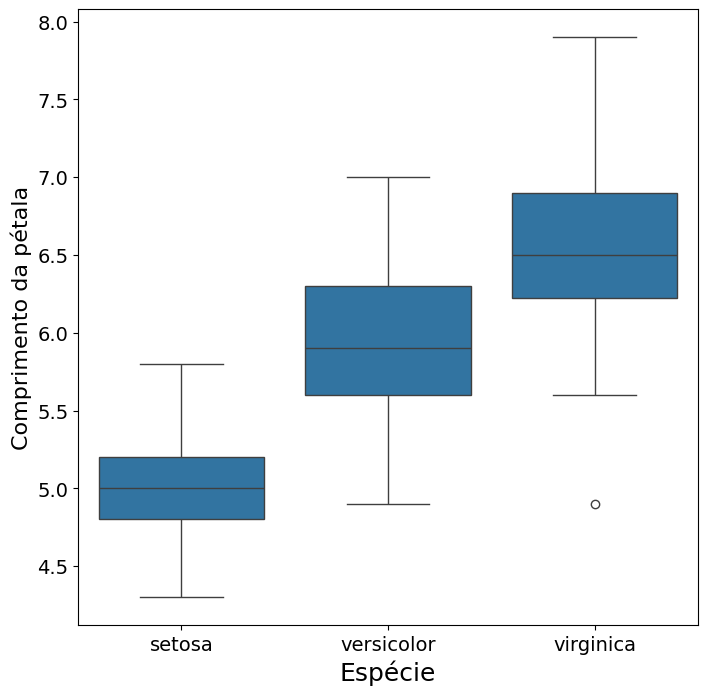

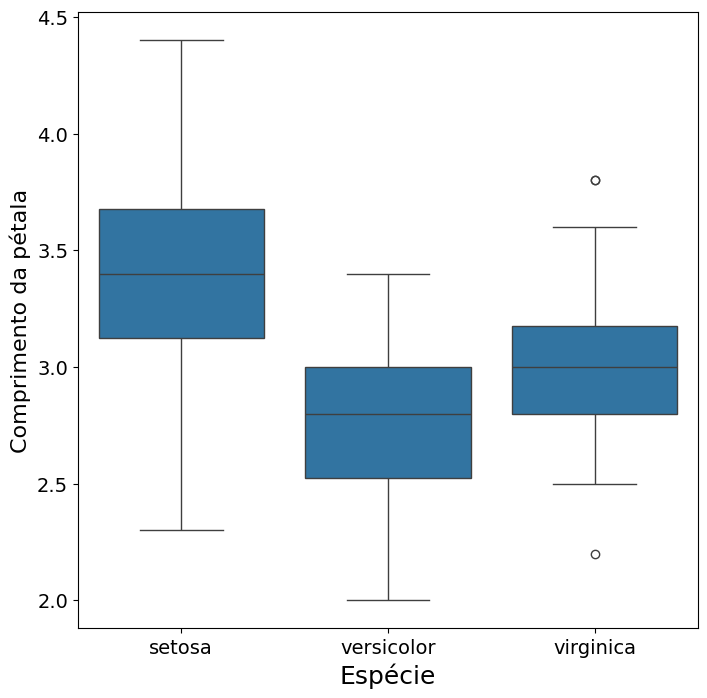

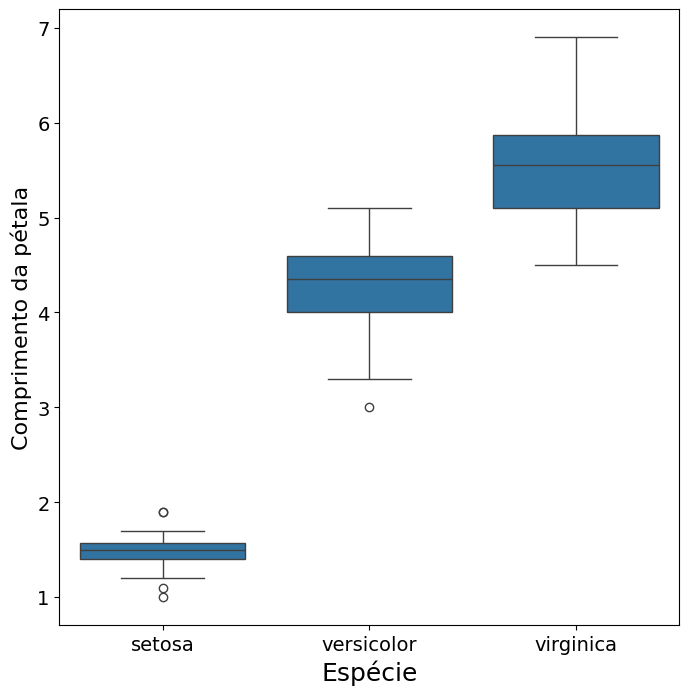

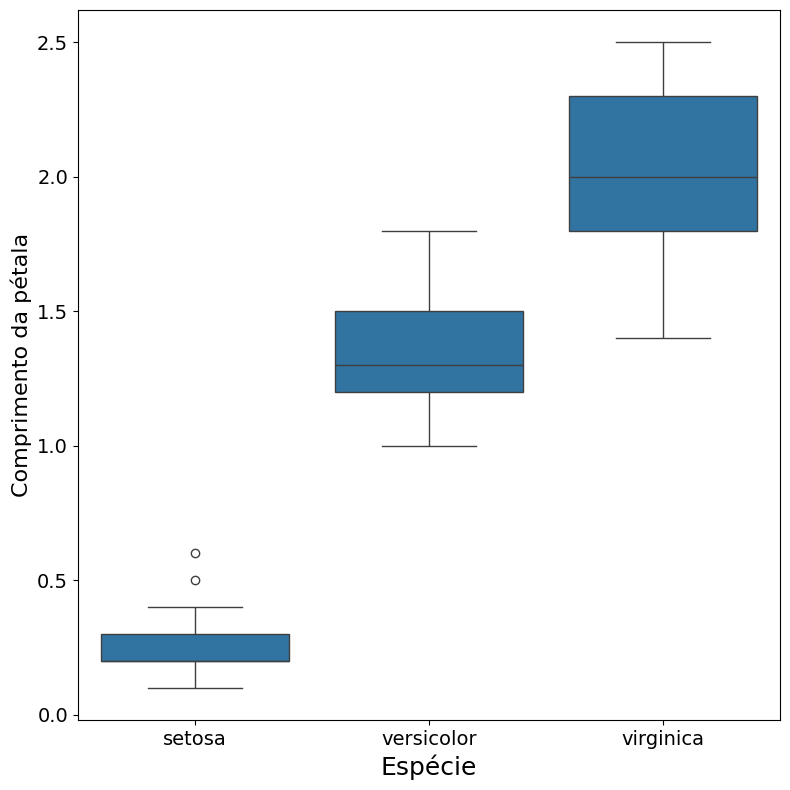

In [24]:
# Criando um box plot para cada coluna
for i, col in enumerate(iris.columns[0:iris2.shape[1]-1]):
    plt.figure(figsize=(8,8)),
    sns.boxplot(x='species', y=iris[col], data=iris),
    plt.xlabel('Espécie', fontsize=18),
    plt.ylabel('Comprimento da pétala', fontsize=16),
    plt.xticks(fontsize=14),
    plt.yticks(fontsize=14)

# Ajustando o layout para não sobrepor os elementos
plt.tight_layout()
plt.show()

**Questão 4**

In [15]:
caminho = '/content/drive/MyDrive/USP/Introdução a Ciência de Dados/Prática 1/data/Advertising.csv'
adv = pd.read_csv(caminho, header=(0))
adv

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [16]:
adv = adv.drop(adv.columns[0], axis=1)
adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


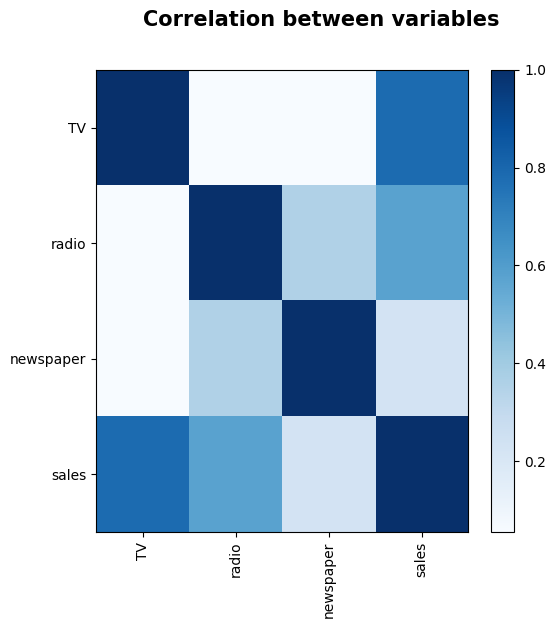

In [17]:
# obtem a matriz de correlação dos dados
corr = adv.corr()
# Mostra a matriz
plt.figure(figsize=(6, 6))
# imshow é usado para mostrar imagens
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
# mostra a barra lateral de cores
plt.colorbar()
# inclui o nome das variáveis
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

In [18]:
print(corr)

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


In [19]:
p = 0 # maior corr
var = []
for i in corr.columns:
    for j in corr.columns:
        if(i != j):
            if np.abs(corr[i][j]) > p: # se maior do que |p|
                p = corr[i][j]
                var = np.array([i,j])
print('Variáveis mais correlacionadas:\n', var)

Variáveis mais correlacionadas:
 ['TV' 'sales']
